<a href="https://colab.research.google.com/github/AnimeshBasak-14/IPL-Score-Prediction-using-Deep-Learning/blob/main/ML_%7C_IPL_Score_Prediction_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libaries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


Loading the dataset!

In [ ]:
ipl = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Regression/Data set/ML | IPL Score Prediction using Deep Learning/0y clean data pre ipl.csv')
ipl.head()


,Unnamed: 0,match_id,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wicket_type,player_dismissed,run,wickets,truns,y
0,0,335982,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0.0,1.0,,,1.0,0.0,1.0,68.0
1,1,335982,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,,,0.0,0.0,1.0,68.0
2,2,335982,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,1.0,,,1.0,0.0,2.0,68.0
3,3,335982,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,,,0.0,0.0,2.0,68.0
4,4,335982,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,,,0.0,0.0,2.0,68.0


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Regression/Data set/ML | IPL Score Prediction using Deep Learning/IPL Player Stats - 2016 till 2019.csv')
data.head()


,Team,Player,Tournament,Matches,Batting Innings,Not Out,Runds Scored,Highest Score,Batting Average,Balls Faced,...,Runs Conceded,Wickets Taken,Best Bowling Figures,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made
0,Delhi Daredevils,CH Morris,IPL 2016,12,7,4,195,82*,65.00,109,...,308,13,2/30,23.69,7.00,20.3,0,0,8,0
1,Delhi Daredevils,CH Morris,IPL 2017,9,9,4,154,52*,30.80,94,...,240,12,4/26,20.00,7.74,15.5,1,0,5,0
2,Delhi Daredevils,CH Morris,IPL 2018,4,4,3,46,27*,46.00,26,...,143,3,2/41,47.66,10.21,28.0,0,0,2,0
3,Delhi Daredevils,JP Duminy,IPL 2016,10,8,3,191,49*,38.20,156,...,55,2,1/4,27.50,7.85,21.0,0,0,3,0
4,Delhi Daredevils,Q de Kock,IPL 2016,13,13,1,445,108,37.08,327,...,-,-,-,-,-,-,-,-,2,2


Data cleaning and formatting

In [ ]:
ipl= ipl.drop(['Unnamed: 0','extras','match_id', 'runs_off_bat'],axis = 1)
new_ipl = pd.merge(ipl,data,left_on='striker',right_on='Player',how='left')
new_ipl.drop(['wicket_type', 'player_dismissed'],axis=1,inplace=True)
new_ipl.columns


Index(['venue', 'innings', 'ball', 'batting_team', 'bowling_team', 'striker',
       'non_striker', 'bowler', 'run', 'wickets', 'truns', 'y', 'Team',
       'Player', 'Tournament', 'Matches', 'Batting Innings', 'Not Out',
       'Runds Scored', 'Highest Score', 'Batting Average', 'Balls Faced',
       'Batting Strike Rate', '100', '50', '0', '4s', '6s', 'Bowling Innings',
       'Overs Bowled', 'Maidens Bowled', 'Runs Conceded', 'Wickets Taken',
       'Best Bowling Figures', 'Bowling Average', 'Bowling Economy Rate',
       'Bowling Strike Rate', '4+ Innings Wickets', '5+ Innings Wickets',
       'Catches Taken', 'Stumpings Made'],
      dtype='object')

In [ ]:
str_cols = new_ipl.columns[new_ipl.dtypes==object]
new_ipl[str_cols] = new_ipl[str_cols].fillna('.')


Encoding the categorical data to numerical values.

In [ ]:
listf = []

for c in new_ipl.columns:
	if new_ipl[c].dtype==object:
		print(c,"->" ,new_ipl[c].dtype)
		listf.append(c)


venue -> object
batting_team -> object
bowling_team -> object
striker -> object
non_striker -> object
bowler -> object
Team -> object
Player -> object
Tournament -> object
Batting Innings -> object
Not Out -> object
Runds Scored -> object
Highest Score -> object
Batting Average -> object
Balls Faced -> object
Batting Strike Rate -> object
100 -> object
50 -> object
0 -> object
4s -> object
6s -> object
Bowling Innings -> object
Overs Bowled -> object
Maidens Bowled -> object
Runs Conceded -> object
Wickets Taken -> object
Best Bowling Figures -> object
Bowling Average -> object
Bowling Economy Rate -> object
Bowling Strike Rate -> object
4+ Innings Wickets -> object
5+ Innings Wickets -> object


In [ ]:
a1 = new_ipl['venue'].unique()
a2 = new_ipl['batting_team'].unique()
a3 = new_ipl['bowling_team'].unique()
a4 = new_ipl['striker'].unique()
a5 = new_ipl['bowler'].unique()

def labelEncoding(data):
	dataset = pd.DataFrame(new_ipl)
	feature_dict ={}

	for feature in dataset:
		if dataset[feature].dtype==object:
			le = preprocessing.LabelEncoder()
			fs = dataset[feature].unique()
			le.fit(fs)
			dataset[feature] = le.transform(dataset[feature])
			feature_dict[feature] = le

	return dataset

labelEncoding(new_ipl)


,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,run,wickets,...,Runs Conceded,Wickets Taken,Best Bowling Figures,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made
0,15,1,0.1,7,13,186,30,201,1.0,0.0,...,1,1,1,1,1,1,1,1,NaN,NaN
1,15,1,0.2,7,13,30,184,201,0.0,0.0,...,0,0,0,0,0,0,0,0,1.0,0.0
2,15,1,0.2,7,13,30,184,201,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0
3,15,1,0.2,7,13,30,184,201,0.0,0.0,...,0,0,0,0,0,0,0,0,8.0,0.0
4,15,1,0.3,7,13,30,184,201,1.0,0.0,...,0,0,0,0,0,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85186,31,1,6.5,14,10,127,47,220,1.0,1.0,...,0,0,0,0,0,0,0,0,9.0,0.0
85187,31,1,6.5,14,10,127,47,220,1.0,1.0,...,0,0,0,0,0,0,0,0,7.0,0.0
85188,31,1,6.6,14,10,48,126,220,1.0,1.0,...,0,0,0,0,0,0,0,0,4.0,0.0
85189,31,1,6.6,14,10,48,126,220,1.0,1.0,...,0,0,0,0,0,0,0,0,10.0,0.0


In [ ]:
ip_dataset = new_ipl[['venue','innings', 'batting_team',
					'bowling_team', 'striker', 'non_striker',
					'bowler']]

b1 = ip_dataset['venue'].unique()
b2 = ip_dataset['batting_team'].unique()
b3 = ip_dataset['bowling_team'].unique()
b4 = ip_dataset['striker'].unique()
b5 = ip_dataset['bowler'].unique()
new_ipl.fillna(0,inplace=True)

features={}

for i in range(len(a1)):
	features[a1[i]]=b1[i]
for i in range(len(a2)):
	features[a2[i]]=b2[i]
for i in range(len(a3)):
	features[a3[i]]=b3[i]
for i in range(len(a4)):
	features[a4[i]]=b4[i]
for i in range(len(a5)):
	features[a5[i]]=b5[i]

features


{'M Chinnaswamy Stadium': 15,
 'Punjab Cricket Association Stadium, Mohali': 26,
 'Feroz Shah Kotla': 9,
 'Eden Gardens': 8,
 'Wankhede Stadium': 39,
 'Sawai Mansingh Stadium': 31,
 'Rajiv Gandhi International Stadium, Uppal': 28,
 'MA Chidambaram Stadium, Chepauk': 18,
 'Dr DY Patil Sports Academy': 5,
 'Newlands': 22,
 "St George's Park": 35,
 'Kingsmead': 14,
 'SuperSport Park': 37,
 'Buffalo Park': 3,
 'New Wanderers Stadium': 21,
 'De Beers Diamond Oval': 4,
 'OUTsurance Oval': 23,
 'Brabourne Stadium': 2,
 'Sardar Patel Stadium, Motera': 29,
 'Barabati Stadium': 1,
 'Vidarbha Cricket Association Stadium, Jamtha': 38,
 'Himachal Pradesh Cricket Association Stadium': 11,
 'Nehru Stadium': 20,
 'Holkar Cricket Stadium': 12,
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 6,
 'Subrata Roy Sahara Stadium': 36,
 'Shaheed Veer Narayan Singh International Stadium': 32,
 'JSCA International Stadium Complex': 13,
 'Sheikh Zayed Stadium': 34,
 'Sharjah Cricket Stadium': 33,
 'Dubai 

Feature Engineering and Selection

In [ ]:
X = new_ipl[['venue', 'innings','batting_team',
			'bowling_team', 'striker','bowler']].values
y = new_ipl['y'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Building, Training & Testing the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
model = Sequential()

model.add(Dense(43, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(22, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(11, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')


In [ ]:
from keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Now you can use the early_stop callback in the fit function
model.fit(x=X_train, y=y_train, epochs=50,
          validation_data=(X_test, y_test),
          callbacks=[early_stop])


Epoch 1/50
1784/1784 [==============================] - 8s 4ms/step - loss: 758.5056 - val_loss: 223.1962
Epoch 2/50
1784/1784 [==============================] - 5s 3ms/step - loss: 500.6256 - val_loss: 197.0839
Epoch 3/50
1784/1784 [==============================] - 4s 2ms/step - loss: 437.9293 - val_loss: 185.9327
Epoch 4/50
1784/1784 [==============================] - 6s 3ms/step - loss: 400.9198 - val_loss: 174.5836
Epoch 5/50
1784/1784 [==============================] - 5s 3ms/step - loss: 369.8606 - val_loss: 165.6372
Epoch 6/50
1784/1784 [==============================] - 4s 2ms/step - loss: 349.3791 - val_loss: 166.1738
Epoch 7/50
1784/1784 [==============================] - 6s 3ms/step - loss: 332.2029 - val_loss: 163.7612
Epoch 8/50
1784/1784 [==============================] - 4s 2ms/step - loss: 318.0070 - val_loss: 167.7058
Epoch 9/50
1784/1784 [==============================] - 4s 2ms/step - loss: 307.1640 - val_loss: 161.6716
Epoch 10/50
1784/1784 [=======================

<Axes: >

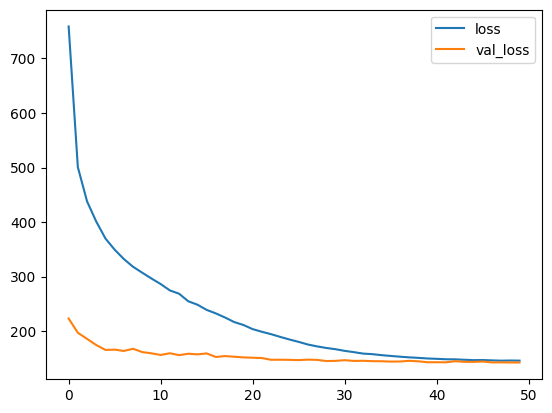

In [ ]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()


Predictions!

In [ ]:
predictions = model.predict(X_test)
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=y_test
sample.head(10)


879/879 [==============================] - 1s 1ms/step


,Predict,Actual
0,50.659882,47.0
1,53.285843,53.0
2,52.606285,56.0
3,50.838943,52.0
4,49.281002,20.0
5,50.908592,47.0
6,49.681061,26.0
7,51.786057,43.0
8,52.228619,55.0
9,49.854073,48.0


Performance Metrics!

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mean_absolute_error(y_test,predictions)


9.381722023725052

In [ ]:
np.sqrt(mean_squared_error(y_test,predictions))


11.943333807003631